# Individual Project

## Imports

In [1]:
# standard imports
import pandas as pd
import numpy as np

# this is to open the dataset/download the keggal dataset
import opendatasets as od
import os

# time imports
from datetime import timedelta, datetime

# visualized your data
import matplotlib.pyplot as plt
import seaborn as sns

# my imports
import wrangle_lugo as wl
import wrangle as w
import prepare as p

## Acquire
- Data acquired from [Kaggle](https://gist.githubusercontent.com/rosendo-lugo/8138692acade48da91cf1c80687f0779/raw/american_bankruptcy.csv)
- Created a Github Gists link to provide a simple way of downloading the file.
    Downloaded .csv file: american_bankruptcy.csv
- It contained 78,682 rows and 21 columns before cleaning
    - 73,462 rows were alive
    - 5,220 rows were failed
- The dataset covers the period from 1999 to 2018 and includes accounting data from 8,262 distinct companies.
- Each row represents company status by year
- Each column represents financial indicators of these companies

## Prepare
- Did not remove any columns
- Did rename all X(num) columns to the appropiate name
- Checked for nulls - no null values found and created a columns for missing percentage
- Checked for unique values - created a columns in the summary dataframe to show the unique values
- Checked that column data types were appropriate
- Outliers: No outliers were removed
- Map categorical variables
- Split data into train, validate, and test (60/20/20)
- Scaled continuous variables

## Data Dictionary

| Variable Name            | Description                                                                                                     |
|--------------------------|--------------------------------------------------------------------------------------------------------|
| X1                       | Current assets - All the assets of a company that are expected to be sold or used as a result of standard business operations over the next year. |
| X2                       | Cost of goods sold - The total amount a company paid as a cost directly related to the sale of products.                                                        |
| X3                       | Depreciation and amortization - Depreciation refers to the loss of value of a tangible fixed asset over time (such as property, machinery, buildings, and plant). Amortization refers to the loss of value of intangible assets over time.  |
| X4                       | EBITDA - Earnings before interest, taxes, depreciation, and amortization. It is a measure of a company's overall financial performance, serving as an alternative to net income. |
| X5                       | Inventory - The accounting of items and raw materials that a company either uses in production or sells.                                                       |
| X6                       | Net Income - The overall profitability of a company after all expenses and costs have been deducted from total revenue.                                        |
| X7                       | Total Receivables - The balance of money due to a firm for goods or services delivered or used but not yet paid for by customers.                                |
| X8                       | Market value - The price of an asset in a marketplace. In this dataset, it refers to the market capitalization since companies are publicly traded in the stock market. |
| X9                       | Net sales - The sum of a company's gross sales minus its returns, allowances, and discounts.                                                                       |
| X10                      | Total assets - All the assets, or items of value, a business owns.                                                                                                 |
| X11                      | Total Long-term debt - A company's loans and other liabilities that will not become due within one year of the balance sheet date.                               |
| X12                      | EBIT - Earnings before interest and taxes.                                                                                                                         |
| X13                      | Gross Profit - The profit a business makes after subtracting all the costs that are related to manufacturing and selling its products or services.               |
| X14                      | Total Current Liabilities - The sum of accounts payable, accrued liabilities, and taxes such as Bonds payable at the end of the year, salaries, and commissions remaining.       |
| X15                      | Retained Earnings - The amount of profit a company has left over after paying all its direct costs, indirect costs, income taxes, and its dividends to shareholders. |
| X16                      | Total Revenue - The amount of income that a business has made from all sales before subtracting expenses. It may include interest and dividends from investments.     |
| X17                      | Total Liabilities - The combined debts and obligations that the company owes to outside parties.                                                                   |
| X18                      | Total Operating Expenses - The expenses a business incurs through its normal business operations.                                                                   |


In [2]:
url = 'https://gist.githubusercontent.com/rosendo-lugo/8138692acade48da91cf1c80687f0779/raw/american_bankruptcy.csv'

In [3]:
df = pd.read_csv(url)

## A summary of the data

In [5]:
w.data_summary(df)

data shape: (78682, 21)


data type  #missing  %missing  #unique    count         mean  \
company_name    object         0       0.0     8971    78682          NaN   
status_label    object         0       0.0        2    78682          NaN   
year             int64         0       0.0       20  78682.0  2007.506317   
x1             float64         0       0.0    65895  78682.0   880.362485   
x2             float64         0       0.0    65690  78682.0  1594.529029   
x3             float64         0       0.0    36010  78682.0   121.234256   
x4             float64         0       0.0    59060  78682.0   376.759424   
x5             float64         0       0.0    38898  78682.0   201.605717   
x6             float64         0       0.0    55550  78682.0   129.382453   
x7             float64         0       0.0    49577  78682.0   286.832743   
x8             float64         0       0.0    77580  78682.0   3414.35461   
x9             float64         0       0.0    68596  78682.0  2364.019706   
x10            float64         0       0.0    71521  78682.0   2867.11062   
x11            float64         0       0.0    39741  78682.0    722.48371   
x12            float64         0       0.0    56949  78682.0   255.525035   
x13            float64         0       0.0    64952  78682.0   769.490783   
x14            float64         0       0.0    58685  78682.0   610.072255   
x15            float64         0       0.0    72062  78682.0   532.467069   
x16            float64         0       0.0    68596  78682.0  2364.019706   
x17            float64         0       0.0    64640  78682.0  1773.563963   
x18            float64         0       0.0    70840  78682.0  1987.260307   

                       std       min       25%        50%         75%  \
company_name           NaN       NaN       NaN        NaN         NaN   
status_label           NaN       NaN       NaN        NaN         NaN   
year              5.742768    1999.0    2002.0     2007.0      2012.0   
x1             3928.564794     -7.76    18.924   100.4495   431.52675   
x2             8930.484664  -366.645  17.03825    103.661     634.548   
x3              652.376804       0.0     1.192     7.9295    47.97175   
x4             2012.023142  -21913.0    -0.811    15.0345   139.65525   
x5             1060.766096       0.0       0.0      7.023    74.74725   
x6             1265.532022  -98696.0  -7.41575      1.616    40.14425   
x7             1335.978571    -0.006   3.28125      22.82    131.5805   
x8            18414.103647    0.0001     34.98  227.51185  1244.88995   
x9            11950.068842 -1964.999   27.5485   186.5985   1046.4025   
x10           12917.944421     0.001   37.3635   213.2035  1171.36475   
x11            3242.170946    -0.023       0.0     7.5935   248.76075   
x12            1494.643534  -25913.0    -2.787      6.518      87.599   
x13            3774.703114  -21536.0   8.52125    63.5815   344.07425   
x14            2938.387443     0.001   8.88925     43.333     222.817   
x15             6369.15944 -102362.0 -68.28275     -1.131      146.07   
x16           11950.068842 -1964.999   27.5485   186.5985   1046.4025   
x17            8053.684902     0.001    13.486     81.988     629.975   
x18           10419.629038  -317.197   32.8725    168.912   875.52225   

                     max  
company_name         NaN  
status_label         NaN  
year              2018.0  
x1              169662.0  
x2              374623.0  
x3               28430.0  
x4               81730.0  
x5               62567.0  
x6              104821.0  
x7               65812.0  
x8            1073390.54  
x9              511729.0  
x10             531864.0  
x11             166250.0  
x12              71230.0  
x13             137106.0  
x14             116866.0  
x15             402089.0  
x16             511729.0  
x17             337980.0  
x18             481580.0

## Prepare the DATA

In [7]:
df = w.prep_data(df)

In [9]:
df

company_name  status_label  year  current_assets  cost_of_goods_sold  \
0              C_1             1  1999         511.267             833.107   
1              C_1             1  2000         485.856             713.811   
2              C_1             1  2001         436.656             526.477   
3              C_1             1  2002         396.412             496.747   
4              C_1             1  2003         432.204             523.302   
...            ...           ...   ...             ...                 ...   
78677       C_8971             1  2014         233.211              43.338   
78678       C_8971             1  2015         105.559              59.184   
78679       C_8971             1  2016          63.971              69.074   
78680       C_8971             1  2017         135.207              66.527   
78681       C_8971             1  2018          82.589              68.817   

       depreciation_and_amortization   ebitda  inventory  net_income  \
0                             18.373   89.031    336.018      35.163   
1                             18.577   64.367    320.590      18.531   
2                             22.496   27.207    286.588     -58.939   
3                             27.172   30.745    259.954     -12.410   
4                             26.680   47.491    247.245       3.504   
...                              ...      ...        ...         ...   
78677                         14.094   45.615      3.376      25.261   
78678                         42.592  202.133      2.288     129.688   
78679                         65.057   79.051      2.581      -1.442   
78680                         65.330   69.171      2.013     -20.401   
78681                         65.201   67.262      2.112     -50.946   

       total_receivables  ...  net_sales  total_assets  total_long_term_debt  \
0                128.348  ...   1024.333       740.998               180.447   
1                115.187  ...    874.255       701.854               179.987   
2                 77.528  ...    638.721       710.199               217.699   
3                 66.322  ...    606.337       686.621               164.658   
4                104.661  ...    651.958       709.292               248.666   
...                  ...  ...        ...           ...                   ...   
78677             22.846  ...    104.223      1099.101               184.666   
78678             54.611  ...    291.153      1865.926               770.103   
78679             42.467  ...    169.858      1746.235               683.985   
78680             27.217  ...    161.884      1736.110               694.035   
78681             45.839  ...    160.513      1625.370               632.122   

          ebit  gross_profit  total_current_liabilities  retained_earnings  \
0       70.658       191.226                    163.816            201.026   
1       45.790       160.444                    125.392            204.065   
2        4.711       112.244                    150.464            139.603   
3        3.573       109.590                    203.575            124.106   
4       20.811       128.656                    131.261            131.884   
...        ...           ...                        ...                ...   
78677   31.521        60.885                     28.197             28.095   
78678  159.541       231.969                     88.128            157.783   
78679   13.994       100.784                     85.765            156.341   
78680    3.841        95.357                     82.010            135.941   
78681    2.061        91.696                     79.365             84.995   

       total_revenue   total_liabilities   total_operating_expenses  
0            1024.333             401.483                   935.302  
1             874.255             361.642                   809.888  
2             638.721             399.964                   611.514  
3             606.337     

In [27]:
df.status_label.value_counts()

1    73462
0     5220
Name: status_label, dtype: int64

# Explore

### What is the distribution of the target?

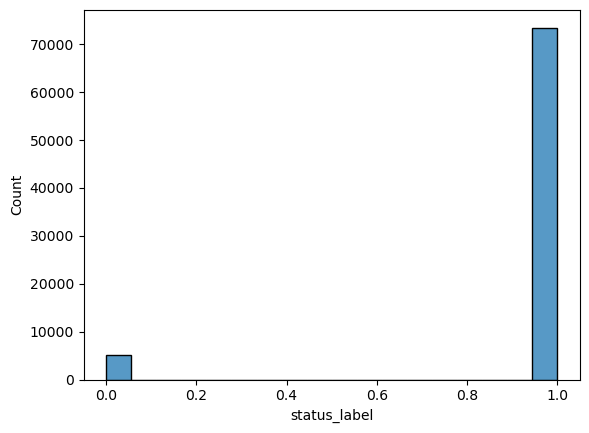

In [18]:
# get a histplot of quality
sns.histplot(df.status_label)
plt.show()

### Pair Plot

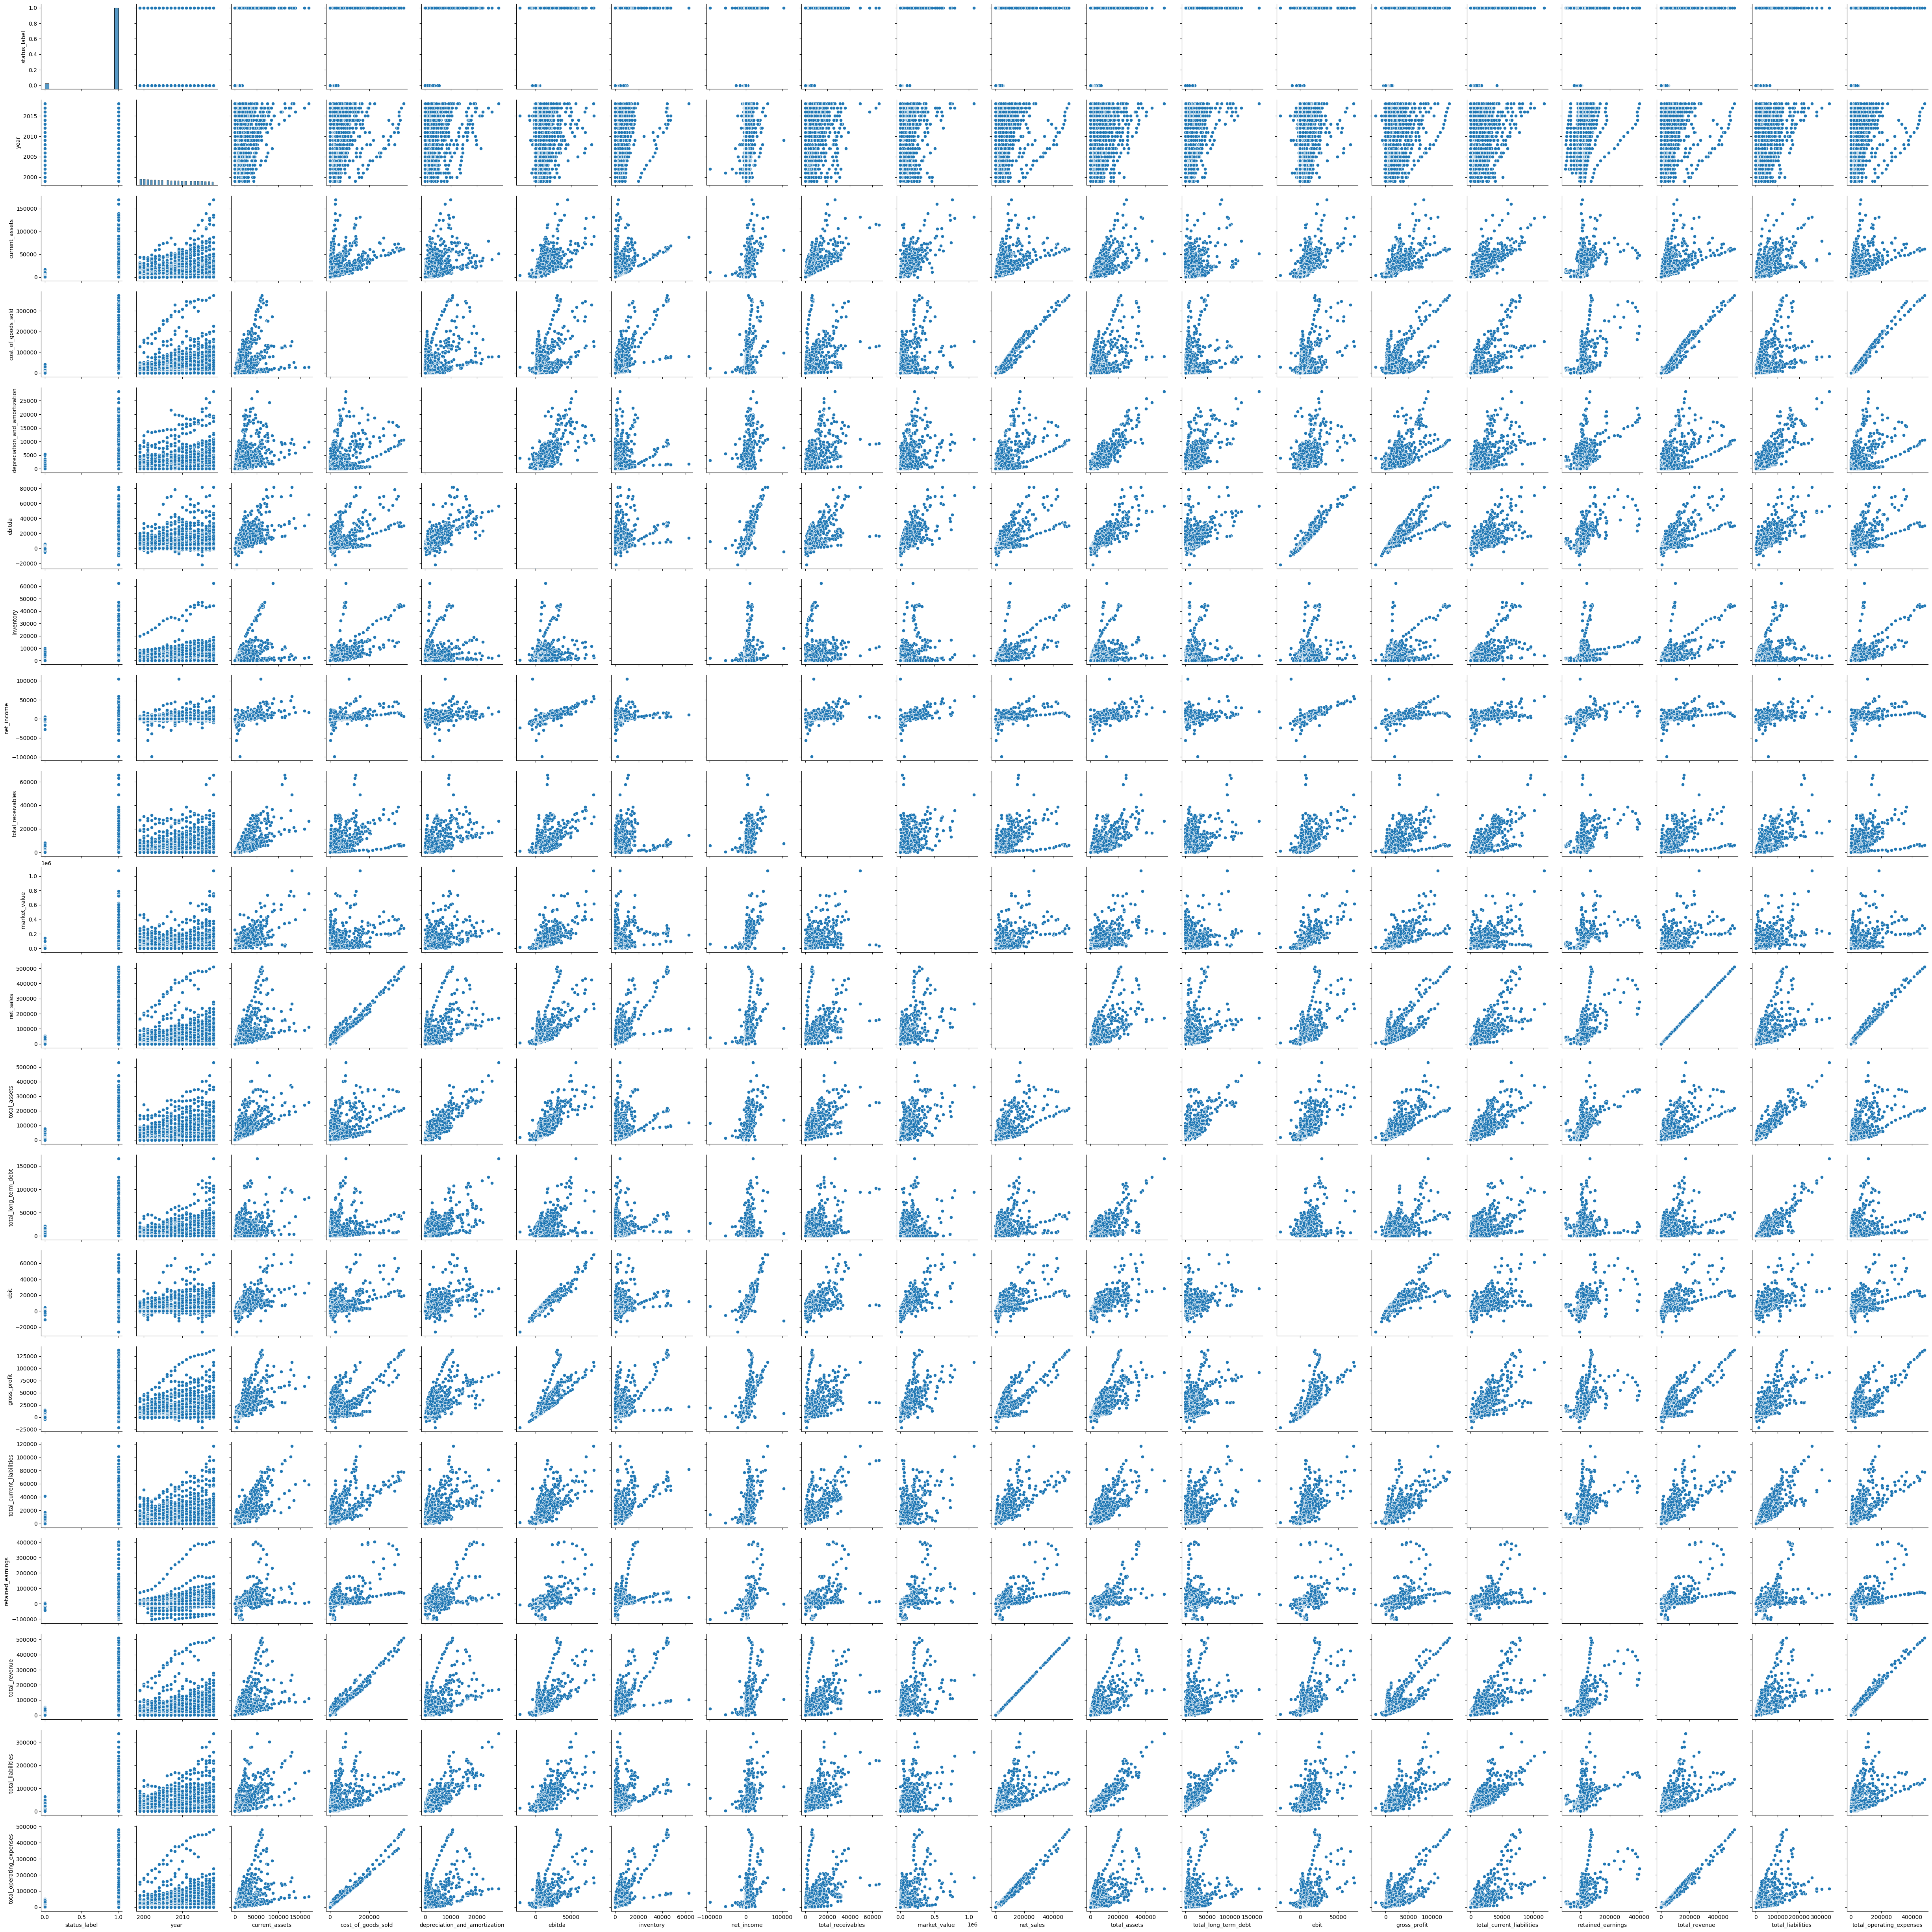

In [10]:
sns.pairplot(df)

### Histplot

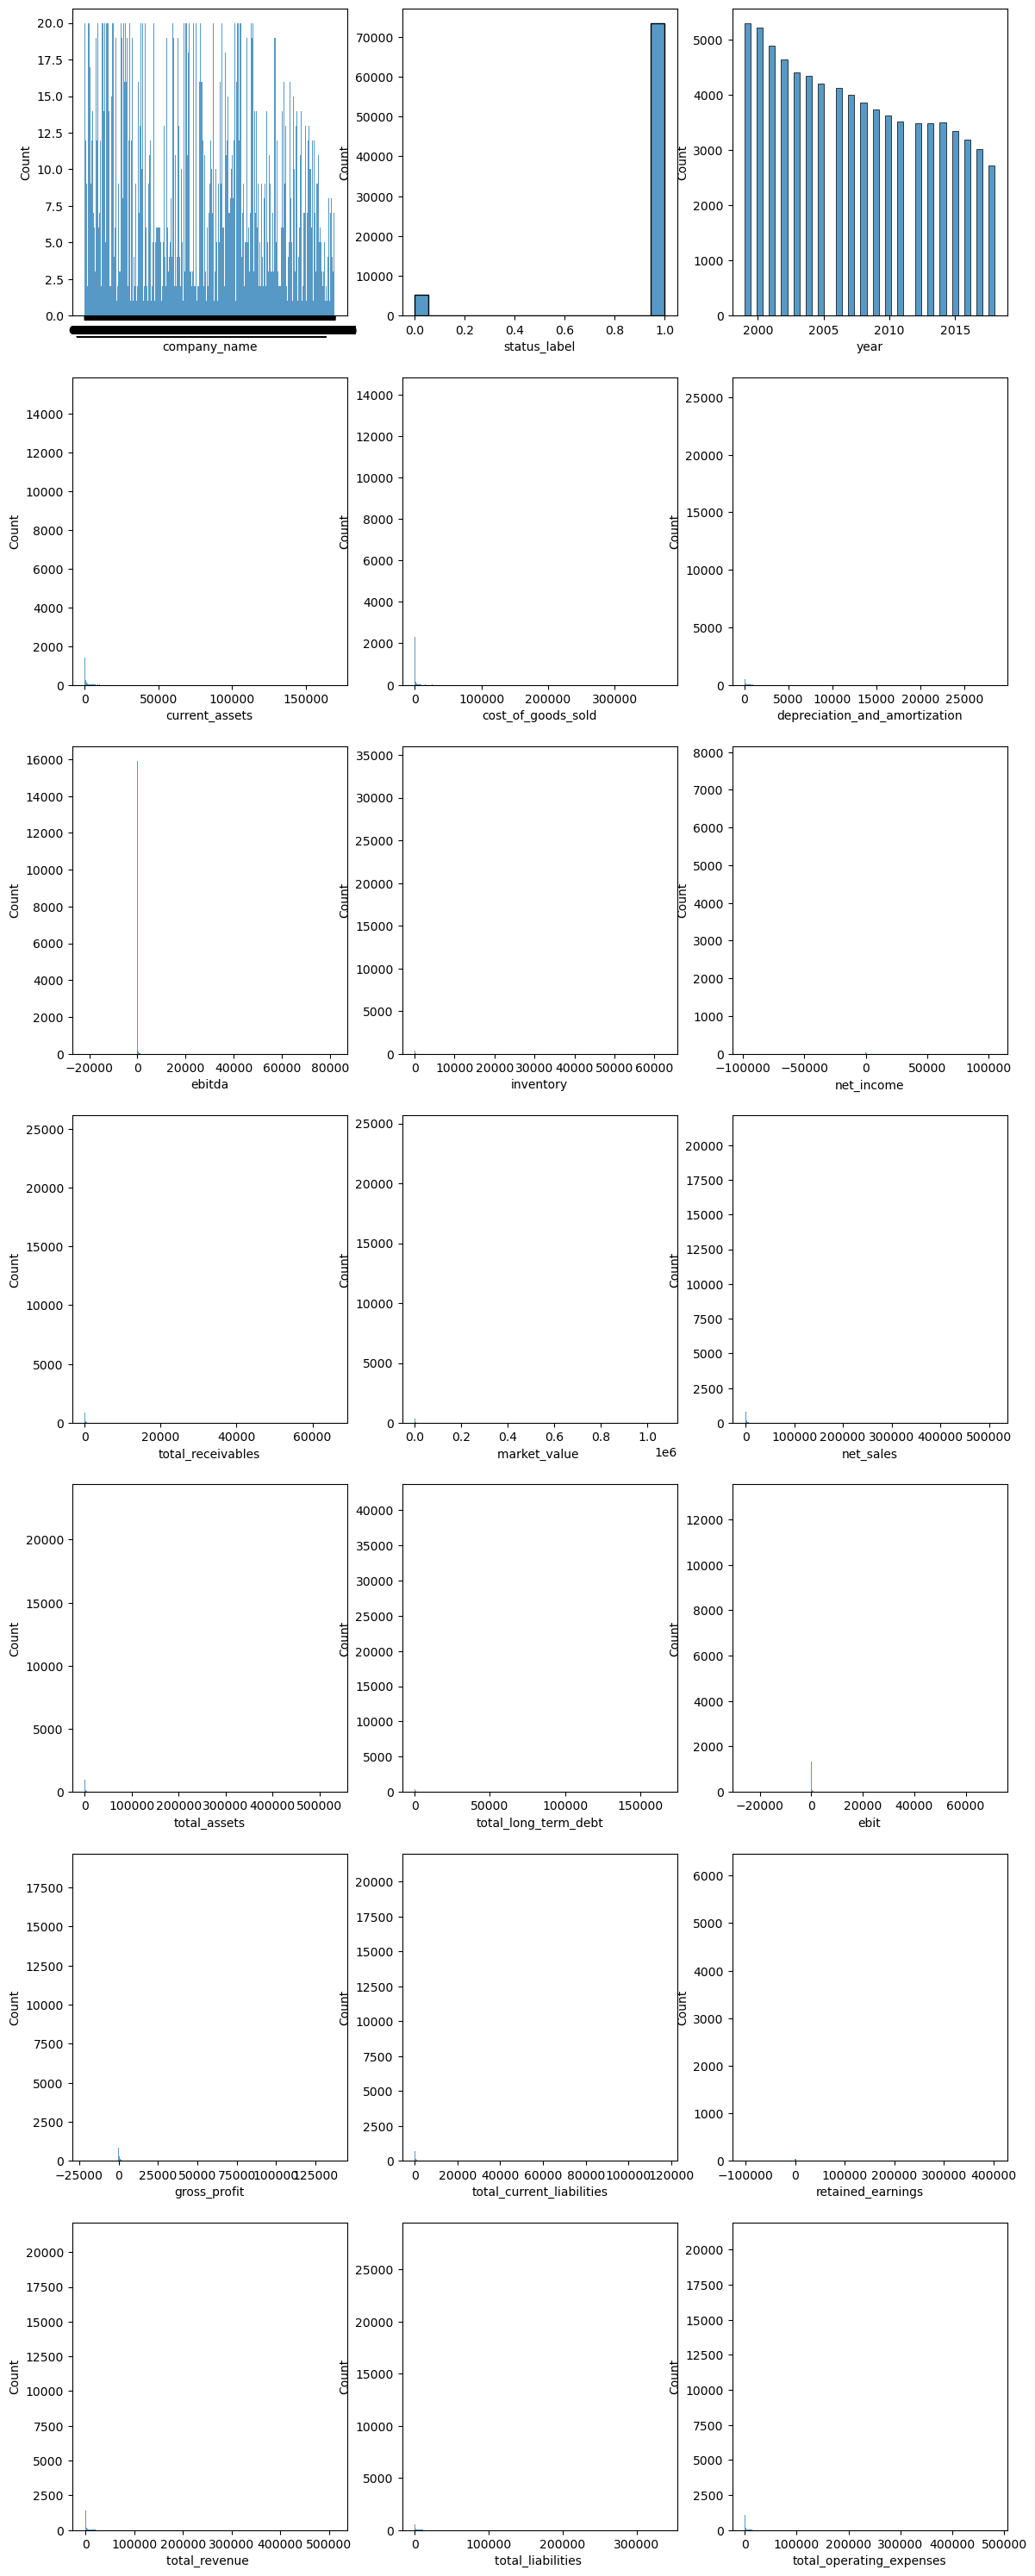

In [19]:
plt.figure(figsize=(14,38))
plt.xticks(rotation = 45)
for i, col in enumerate(df):
    plt.subplot(7,3,i+1)
    sns.histplot(df[col])
plt.show()

In [11]:
list_col = list(df.columns)

year


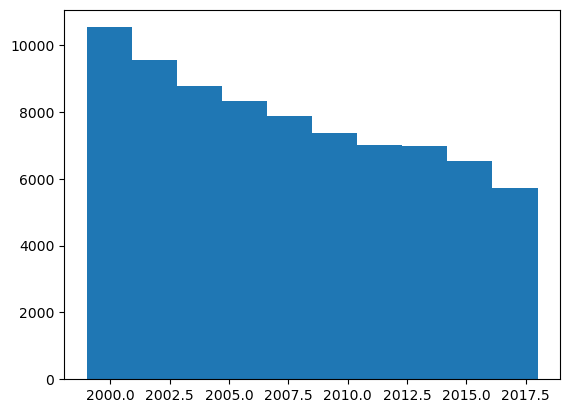

current_assets


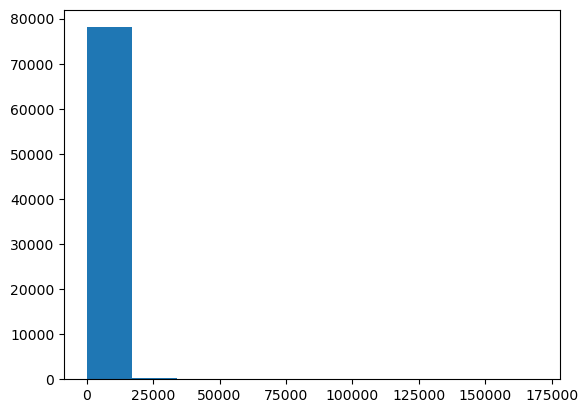

cost_of_goods_sold


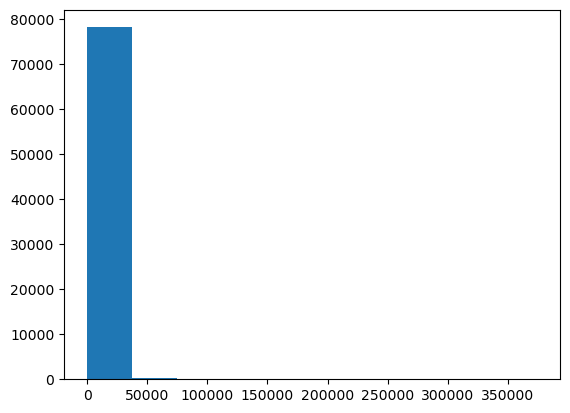

depreciation_and_amortization


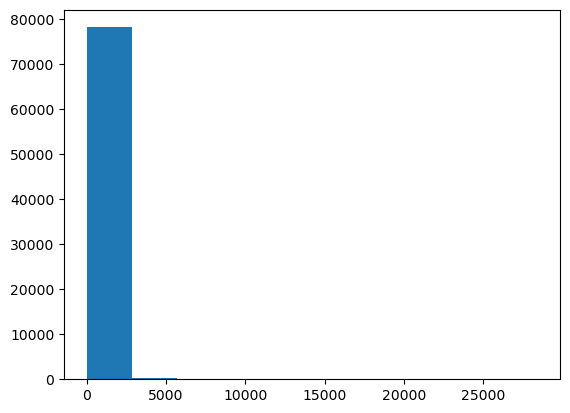

ebitda


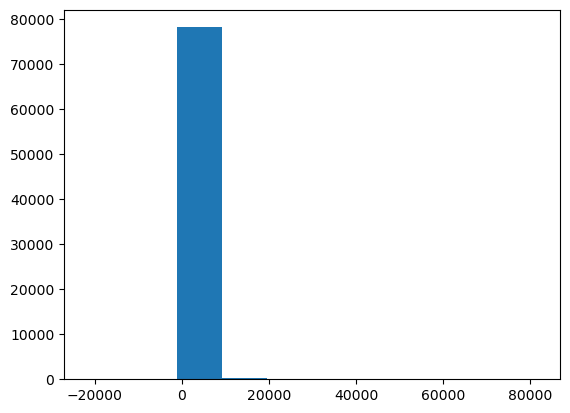

inventory


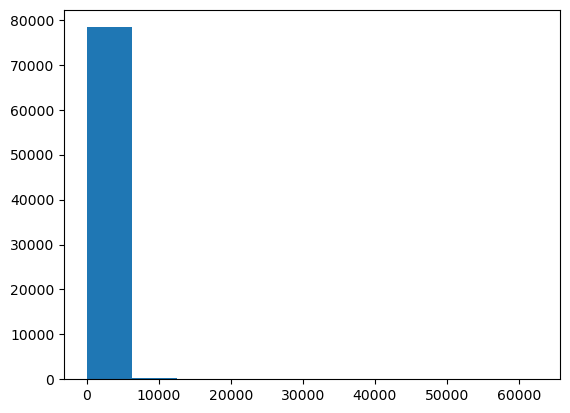

net_income


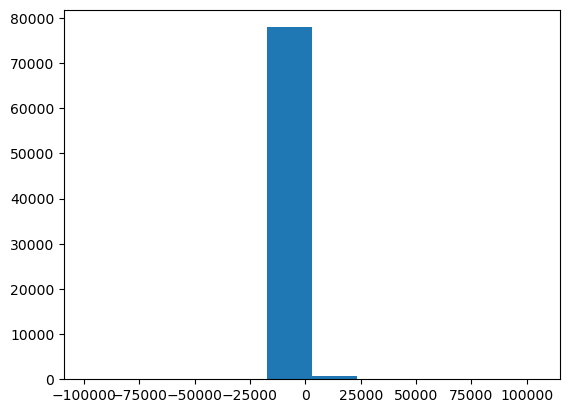

total_receivables


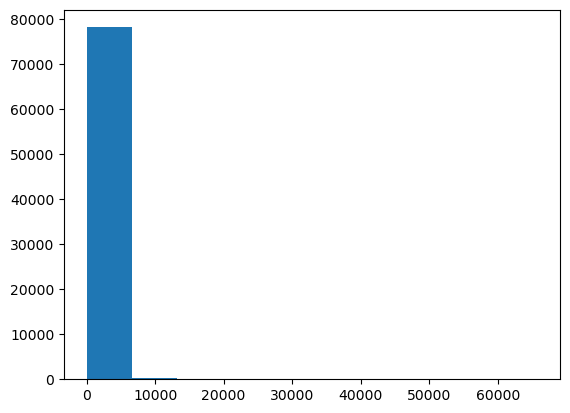

market_value 


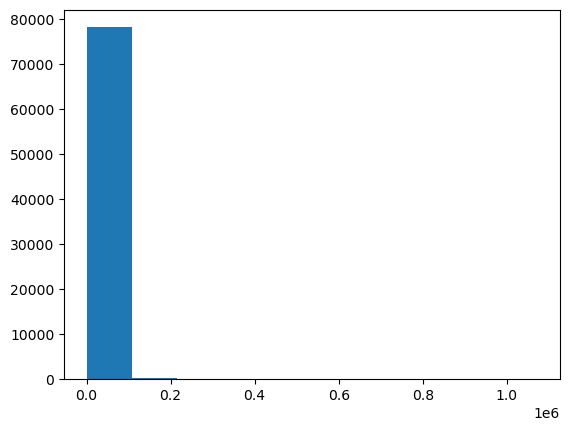

net_sales


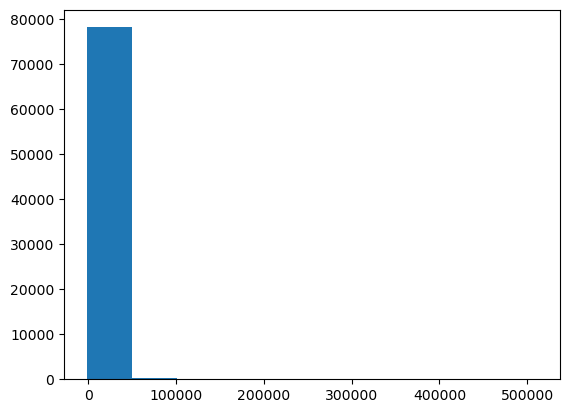

total_assets


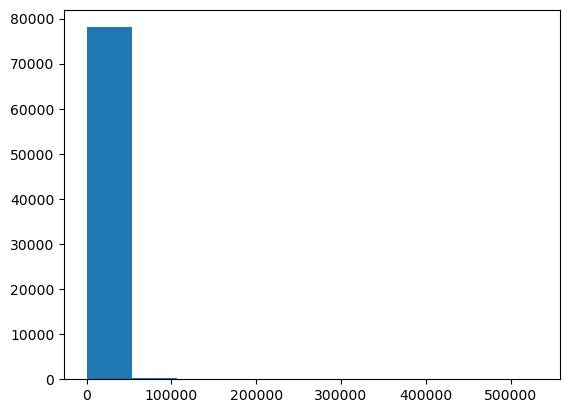

total_long_term_debt


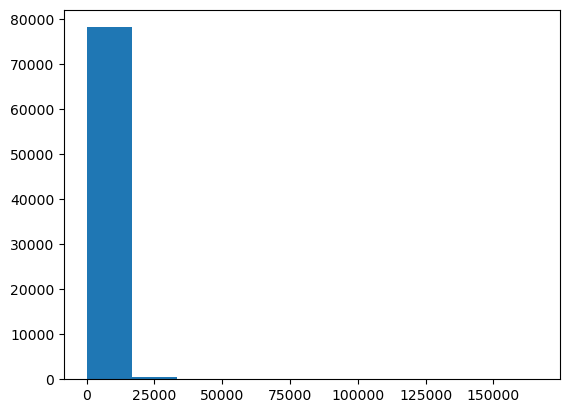

ebit


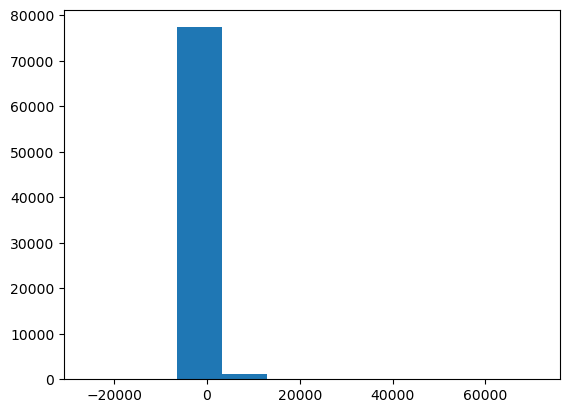

gross_profit


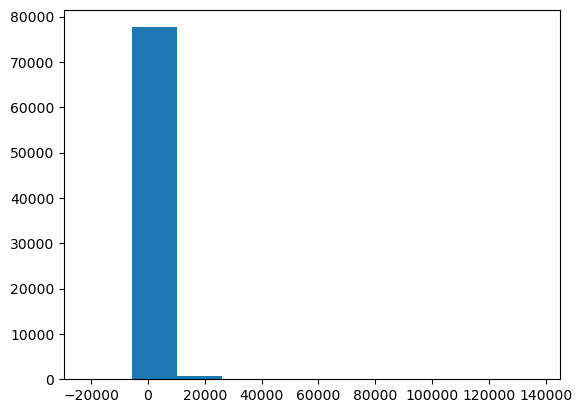

total_current_liabilities


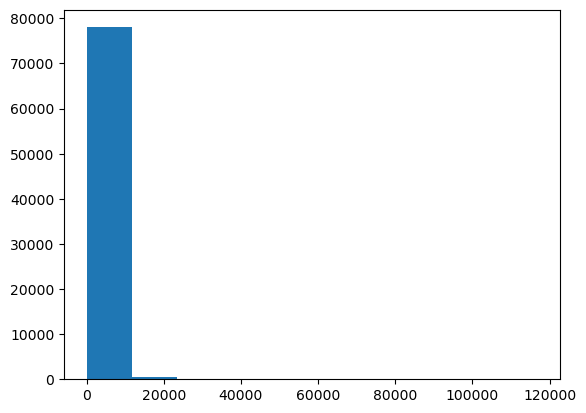

retained_earnings


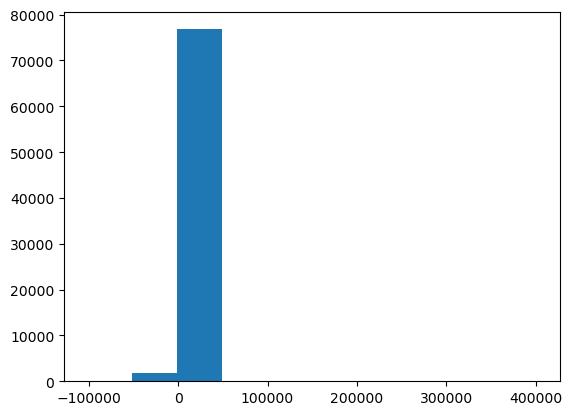

total_revenue 


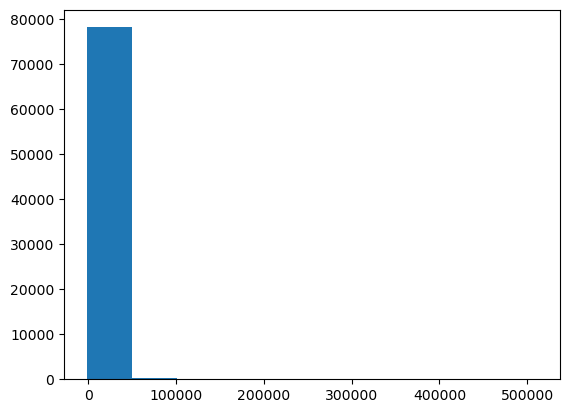

total_liabilities 


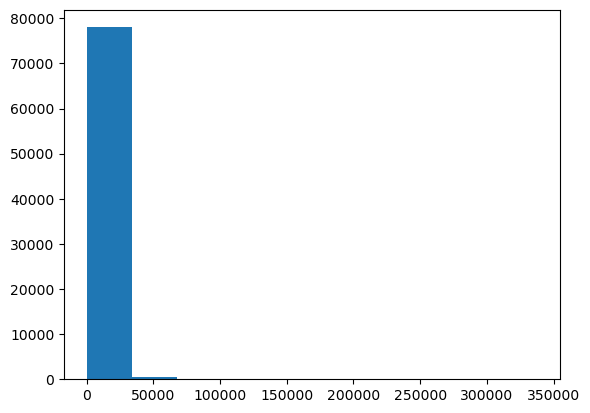

total_operating_expenses


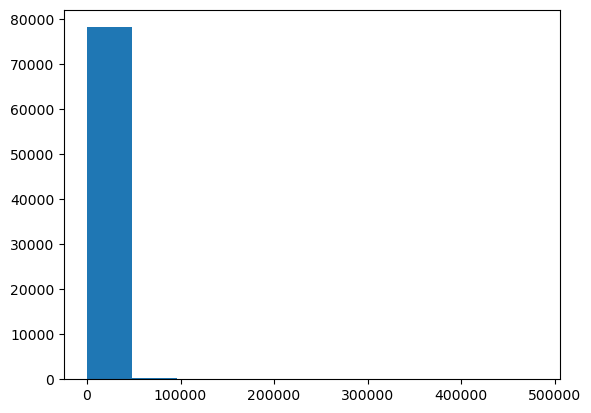

In [26]:
# perform a plot distribution of all the features
for col in list_col[2:]:
    print(col)
    plt.hist(df[col])
    plt.show()

In [34]:
# # perform a plot distribution of all the features
# for col in list_col[2:]:                           
#     print(col)
#     plt.boxplot(df[col])
#     plt.show()

## Correlation Matrix

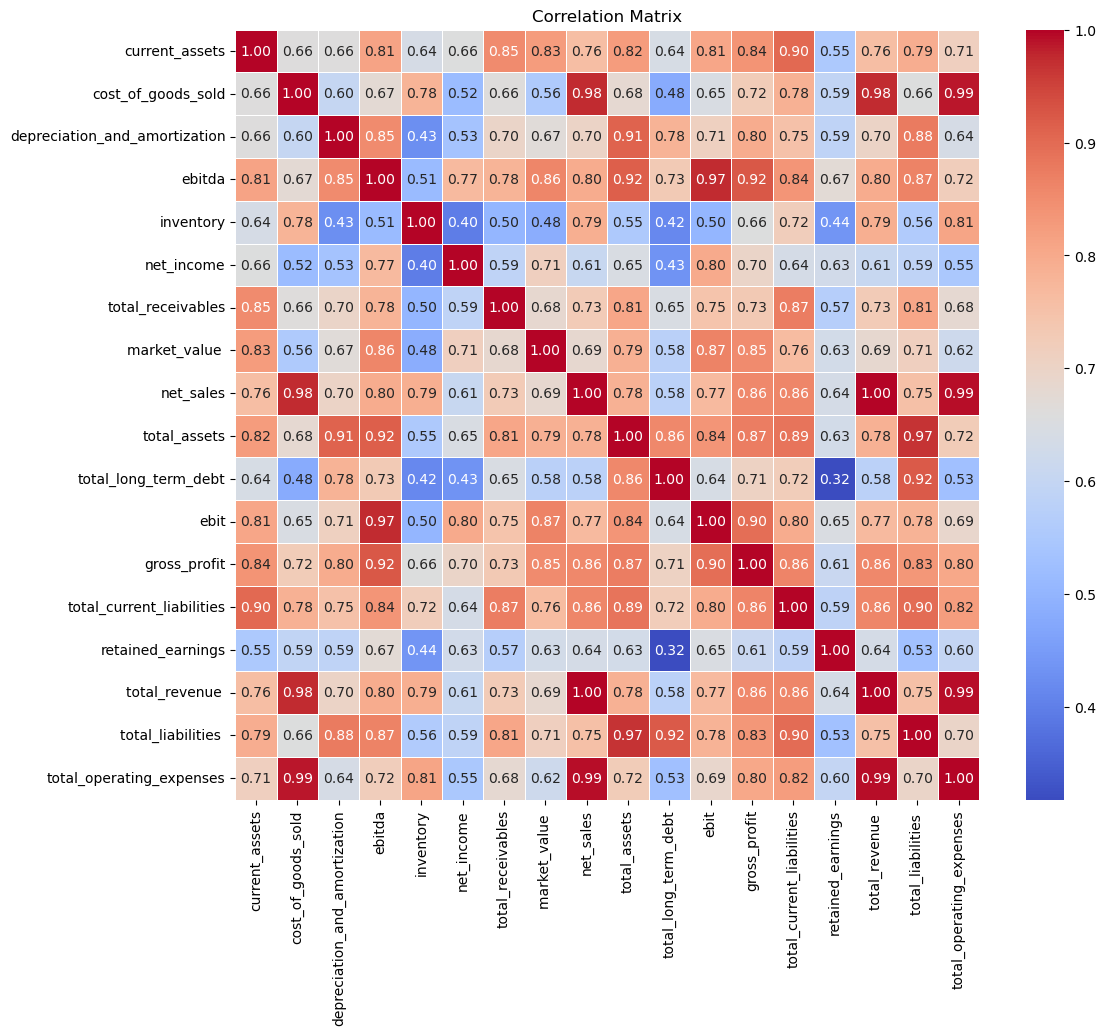

In [33]:
list_col = list(df.columns)
data = df[list_col[3:]]
correlation_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')

plt.show()

## Question 1: Is "x" associated with "y"?

### Analyze "x" vs "y" with stats

### Summarize

## Question 2: Is "a" associated with "b"?

### Analyze "a" vs "b" with stats

### Summarize

## Question 3: Is 'c' associated with 'd'?

### Analyze "a" vs "b" with stats

### Summarize

## Question 4: Is 'c' associated with 'd'?

### Analyze "a" vs "b" with stats

### Summarize

### Exploration Summary
-
-
-

### (As Required) Features I am moving to modeling with
1.
2.
3.
4.

or NONE

## Modeling